In [20]:
import numpy as np
import pandas as pd
import os
from sklearn.manifold import MDS

In [17]:
df = pd.read_csv('csv/radiomicas_combinadas_normalizado.csv')
df.head(5)

,Patient,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,"""LUNG1-001""",0.264279,-0.471885,-0.279790,0.025573,-0.868932,-0.822722,-0.349502,0.348139,-0.353586,...,-0.455265,-0.541469,-0.374795,-0.501476,-0.242314,0.370344,0.176528,0.069843,-0.877628,-0.241632
1,"""LUNG1-002""",0.891578,-0.296446,-0.959418,-0.441895,-0.934466,-0.033895,-0.899003,0.711427,-0.869634,...,0.739820,0.633005,-0.881724,0.622963,-0.734643,0.567559,-0.776670,-0.128058,-0.330652,-0.733208
2,"""LUNG1-003""",0.856728,-0.269456,-0.951453,-0.232302,-0.902913,-0.333322,-0.426578,0.693127,-0.817416,...,0.379133,0.320005,-0.867582,0.276626,-0.758680,0.504227,-0.687561,-0.229417,-0.356036,-0.758210
3,"""LUNG1-004""",0.614714,-0.386415,-0.869261,-0.007804,-0.893204,-0.698773,-0.818605,0.464850,-0.517251,...,-0.014991,0.320115,-0.897614,0.241081,-0.829087,-0.352370,-0.666127,-0.398285,-0.257494,-0.827604
4,"""LUNG1-005""",-0.165537,-0.368421,-0.509448,0.272623,-0.771845,-0.875361,-0.887043,0.234176,-0.056650,...,0.264146,0.391344,-0.811464,0.305482,-0.734737,0.097634,-0.580804,-0.231773,-0.442251,-0.733612


In [32]:
embedding =MDS(n_components=2, random_state=42)
reducted_data = pd.DataFrame(embedding.fit_transform(df.drop(columns=['Patient'])))



/home/roth/aaron/TFG/code/venv/lib/python3.14/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/home/roth/aaron/TFG/code/venv/lib/python3.14/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


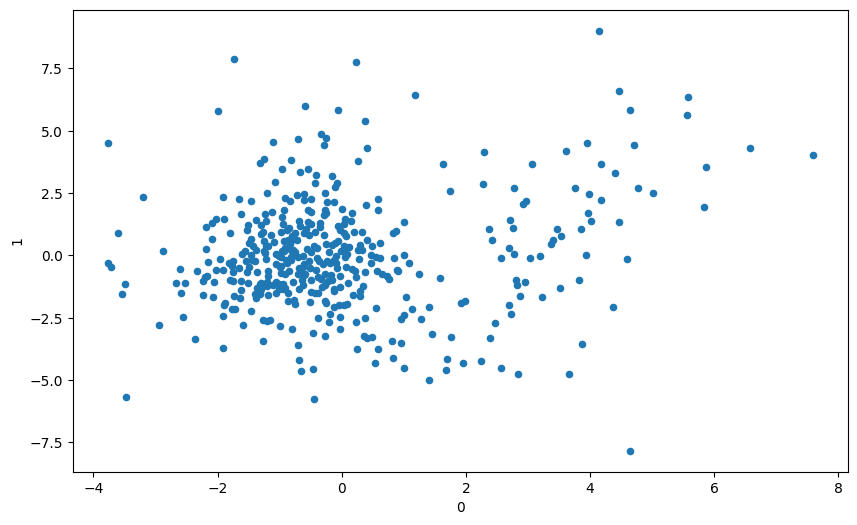

In [ ]:
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 6), title='MDS Projection of Radiomic Features')